In [227]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/00_Commons/03_Scripts/")
sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/03_Scripts/stochmod/model/")
import scm
from amv import proc,viz
projpath   = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/"
rawpath    = projpath + '01_Data/model_input/'
datpath2   = projpath + '01_Data/model_output/'


In [228]:
# Set paths to the masks
datpath = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/"
fn1 = datpath + "CESM-FULL_landicemask360.npy"
fn2 = datpath + "CESM-SLAB_landicemask360.npy"
fn3 = datpath + "model_input/landicemask_enssum.npy"

In [229]:
# Load the Masks
picfull = np.load(fn1)
picslab = np.load(fn2)
htrfull = np.load(fn3)

In [230]:
# Load lat/lon
lon180,lat  = scm.load_latlon(rawpath)
lon360,_    = scm.load_latlon(rawpath,lon360=True)
lonr        = np.load(datpath2+"lon.npy")
latr        = np.load(datpath2+"lat.npy")

(<matplotlib.collections.QuadMesh at 0x7ff3cb084750>,
 <matplotlib.colorbar.Colorbar at 0x7ff3ca2b4810>)

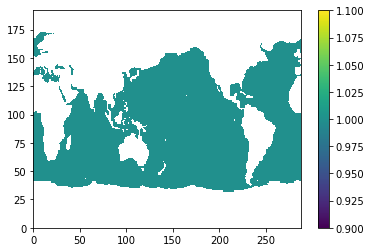

In [37]:
plt.pcolormesh(picfull),plt.colorbar()

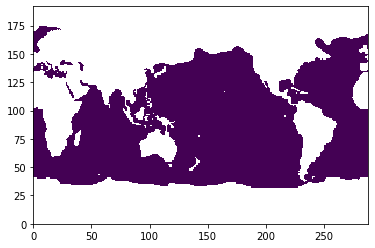

In [38]:
plt.pcolormesh(picslab)

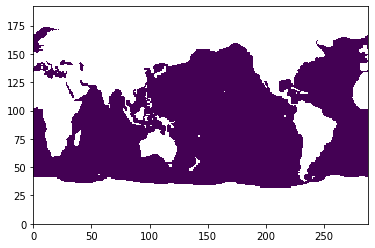

In [39]:
plt.pcolormesh(htrfull)

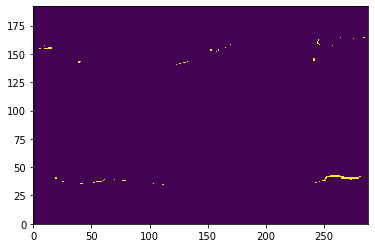

In [40]:
plt.pcolormesh(np.isnan(htrfull) & ~np.isnan(picfull))

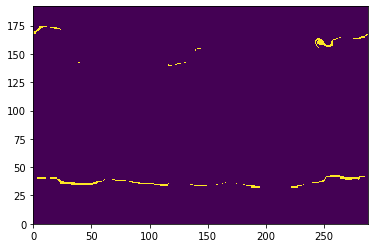

In [41]:
plt.pcolormesh(np.isnan(htrfull) & ~np.isnan(picslab))

In [234]:
_,msk180 = proc.lon360to180(lon360,htrfull.T)

In [235]:
pacific_mask = msk180.copy()

[[-100   20]
 [ -70    8]]


/Users/gliu/opt/anaconda3/envs/cvd-12860/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


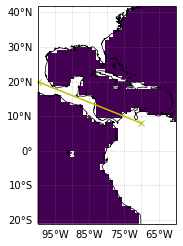

In [285]:
# Draw a line, Try to identify the cutoff points

ptstart = [-100,20]
ptend   = [-70,8]
pts     = np.vstack([ptstart,ptend])
print(pts)

bboxplot = [-100,-60,-20,40] # Simulation Box
fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})

ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
pcm = ax.pcolormesh(lon180,lat,pacific_mask[:,:].T)


#ax.scatter([-70],[5],100,marker="x",color="y")
ax.plot(pts[:,0],pts[:,1],color="y",marker="x") 
#ax.plot([-100,-70],pts[1,:],color="y",marker="x") 

NameError: name 'mskreg' is not defined

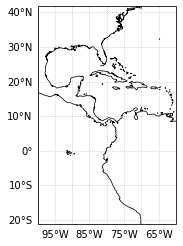

In [286]:
bboxplot = [-100,-60,-20,40] # Simulation Box
fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})

ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
pcm = ax.pcolormesh(lonr,latr,mskreg[:,:].T)

In [287]:

xstart,ystart = proc.find_latlon(ptstart[0],ptstart[1],lon180,lat)
xend,yend     = proc.find_latlon(ptend[0],ptend[1],lon180,lat)

dx = (ptend[0]-ptstart[0])/ np.abs((xend-xstart))
dy = (ptend[1]-ptstart[1])/ np.abs((xend-xstart)) # Abs() for decreasing values

dx,dy

Closest lon to -100.00 was -100.00
Closest lat to 20.00 was 20.26
Closest lon to -70.00 was -70.00
Closest lat to 8.00 was 8.01


(1.25, -0.5)

In [288]:
# Move through the line and set points to nan
pmfix = pacific_mask.copy()

x0 = ptstart[0]
y0 = ptstart[1]
kx = xstart

for i in range(xend-xstart):

    print("Location is %i Lon, eliminating Lat smaller than %i" % (x0,y0))
    kremove = np.where(lat <= y0)
    pmfix[kx,kremove] = np.nan
    print("Removed %i points" % (len(kremove)))
    
    kx += 1
    y0 += dy
    x0 += dx
    
    
    
    
    
    
    

Location is -100 Lon, eliminating Lat smaller than 20
Removed 1 points
Location is -98 Lon, eliminating Lat smaller than 19
Removed 1 points
Location is -97 Lon, eliminating Lat smaller than 19
Removed 1 points
Location is -96 Lon, eliminating Lat smaller than 18
Removed 1 points
Location is -95 Lon, eliminating Lat smaller than 18
Removed 1 points
Location is -93 Lon, eliminating Lat smaller than 17
Removed 1 points
Location is -92 Lon, eliminating Lat smaller than 17
Removed 1 points
Location is -91 Lon, eliminating Lat smaller than 16
Removed 1 points
Location is -90 Lon, eliminating Lat smaller than 16
Removed 1 points
Location is -88 Lon, eliminating Lat smaller than 15
Removed 1 points
Location is -87 Lon, eliminating Lat smaller than 15
Removed 1 points
Location is -86 Lon, eliminating Lat smaller than 14
Removed 1 points
Location is -85 Lon, eliminating Lat smaller than 14
Removed 1 points
Location is -83 Lon, eliminating Lat smaller than 13
Removed 1 points
Location is -82 Lon

In [289]:
# Draw a line, Try to identify the cutoff points


# print(pts)

# bboxplot = [-100,-50,-20,-70] # Simulation Box
# fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})

# ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
# pcm = ax.pcolormesh(lon180,lat,pmfix[:,:].T)

# #ax.scatter([-70],[5],100,marker="x",color="y")
# ax.plot(pts[:,0],pts[:,1],color="y",marker="x") 
# #ax.plot([-100,-70],pts[1,:],color="y",marker="x") 

## Make into a function

Closest lon to -100.00 was -100.00
Closest lat to 20.00 was 20.26
Closest lon to -70.00 was -70.00
Closest lat to 8.00 was 8.01
Location is -100 Lon, eliminating 1 points with Lat less than 20
Location is -98 Lon, eliminating 1 points with Lat less than 19
Location is -97 Lon, eliminating 1 points with Lat less than 19
Location is -96 Lon, eliminating 1 points with Lat less than 18
Location is -95 Lon, eliminating 1 points with Lat less than 18
Location is -93 Lon, eliminating 1 points with Lat less than 17
Location is -92 Lon, eliminating 1 points with Lat less than 17
Location is -91 Lon, eliminating 1 points with Lat less than 16
Location is -90 Lon, eliminating 1 points with Lat less than 16
Location is -88 Lon, eliminating 1 points with Lat less than 15
Location is -87 Lon, eliminating 1 points with Lat less than 15
Location is -86 Lon, eliminating 1 points with Lat less than 14
Location is -85 Lon, eliminating 1 points with Lat less than 14
Location is -83 Lon, eliminating 1 poin

/Users/gliu/opt/anaconda3/envs/cvd-12860/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


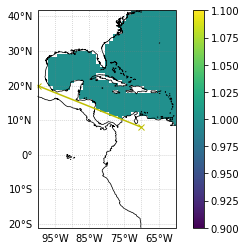

In [290]:
def linear_crop(invar,lat,lon,ptstart,ptend,belowline=True,along_x=True,debug=False,bbox=[-180,180,-90,90]):
    
    """
    invar [lon x lat]
    
    
    """
    
    # Get the indices for starting and ending points
    xstart,ystart = proc.find_latlon(ptstart[0],ptstart[1],lon180,lat)
    xend,yend     = proc.find_latlon(ptend[0],ptend[1],lon180,lat)
    
    # Copy variable
    pmfix = invar.copy()
    
    # Starting X,Y for loop
    x0 = ptstart[0] 
    y0 = ptstart[1]
        
    # Moving zonally, cut out points
    if along_x:
        
        # Calculate the dx and dy moving zonally
        dx = (ptend[0]-ptstart[0])/ np.abs((xend-xstart))
        dy = (ptend[1]-ptstart[1])/ np.abs((xend-xstart)) # Abs() for decreasing values
        
        # Starting index for loop
        kx = xstart
        for i in range(np.abs(xend-xstart)):
            if belowline:
                kremove = np.where(lat <= y0)
                word = "less"
            else: # Remove points above the line
                kremove = np.where(lat >= y0)
                word = "greater"
            pmfix[kx,kremove] = np.nan
            if debug:
                print("Location is %i Lon, eliminating %i points with Lat %s than %i" % (x0,len(kremove),word,y0))
            # Add to Index
            kx += (1*np.sign(xend-xstart))
            y0 += dy
            x0 += dx
    else: # Move meridionally
        
        # Calculate the dx or dy moving meridionally
        dx = (ptend[0]-ptstart[0])/ np.abs((yend-ystart))
        dy = (ptend[1]-ptstart[1])/ np.abs((yend-ystart)) # Abs() for decreasing values
        print(dx,dy)
        # Starting X,y, and y-index
        ky = ystart
        
        for i in range(np.abs(yend-ystart)):
            
            if belowline:
                kremove = np.where(lon <= x0)
                word = "less"
            else: # Remove points above the line
                kremove = np.where(lon >= x0)
                word = "greater"
            
            pmfix[kremove,ky] = np.nan
            if debug:
                print("Location is %i Lat, eliminating %i points with Lon %s than %i" % (y0,len(kremove),word,x0))
            
            # Add to Index
            ky += (1*np.sign(yend-ystart))
            y0 += dy
            x0 += dx
            
    if debug: # Make a plot
        pts     = np.vstack([ptstart,ptend])
        fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})
        ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
        pcm = ax.pcolormesh(lon,lat,pmfix[:,:].T)
        ax.plot(pts[:,0],pts[:,1],color="y",marker="x") 
        fig.colorbar(pcm,ax=ax)
        
    return pmfix



pmfix = linear_crop(msk180,lat,lon180,ptstart,ptend,belowline=True,along_x=True,debug=True,bbox=bboxplot)
    

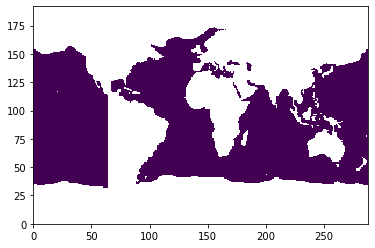

In [291]:
plt.pcolormesh(pmfix.T)


Closest lon to -100.00 was -100.00
Closest lat to 20.00 was 20.26
Closest lon to -70.00 was -70.00
Closest lat to 8.00 was 8.01
Location is -100 Lon, eliminating 1 points with Lat less than 20
Location is -98 Lon, eliminating 1 points with Lat less than 19
Location is -97 Lon, eliminating 1 points with Lat less than 19
Location is -96 Lon, eliminating 1 points with Lat less than 18
Location is -95 Lon, eliminating 1 points with Lat less than 18
Location is -93 Lon, eliminating 1 points with Lat less than 17
Location is -92 Lon, eliminating 1 points with Lat less than 17
Location is -91 Lon, eliminating 1 points with Lat less than 16
Location is -90 Lon, eliminating 1 points with Lat less than 16
Location is -88 Lon, eliminating 1 points with Lat less than 15
Location is -87 Lon, eliminating 1 points with Lat less than 15
Location is -86 Lon, eliminating 1 points with Lat less than 14
Location is -85 Lon, eliminating 1 points with Lat less than 14
Location is -83 Lon, eliminating 1 poin

/Users/gliu/opt/anaconda3/envs/cvd-12860/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


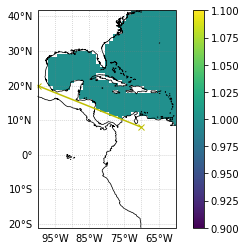

In [292]:
allmask = picfull*picslab*htrfull
#plt.pcolormesh(allmask)

_,msk180 = proc.lon360to180(lon360,allmask.T)
pmfix    = linear_crop(msk180,lat,lon180,ptstart,ptend,belowline=True,along_x=True,debug=True)

In [259]:
savename = datpath + "pacific_limask_180global.npy"
np.save(savename,pmfix)

## Scrap

In [191]:
# Make  mesh grid
YY,XX = np.meshgrid(lat,lon180)

plt.pcolormesh(XX.T),plt.colorbar()